In [1]:
import pandas as pd
import seaborn as sbn
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
q=[i for i in os.listdir() if 'result21' in i]
q=list(map(lambda x:pd.read_parquet(x),q))

In [98]:
q=[i for i in os.listdir('../result_1') if 'protein1.' in i]
q

['7.result_protein1.parquet',
 '8.result_protein1.parquet',
 '2.result_protein1.parquet',
 '6.result_protein1.parquet',
 '3.result_protein1.parquet',
 '5.result_protein1.parquet',
 '4.result_protein1.parquet',
 '9.result_protein1.parquet',
 '0.result_protein1.parquet',
 '1.result_protein1.parquet']

In [6]:
for i in range(len(q)):
    q[i]['Rep']=i
w=pd.concat(q)

In [7]:
w=w.reset_index().set_index(['Rep','index'])

In [12]:
w3={}
#protein uniquess
count=0
for i in w.columns:
    for j in range(10):
        _=w.loc[j][i].drop_duplicates().shape
        w3[count]={'Rep':j,'Uniq':_[0],'Gen':int(i.replace('Gen_',''))}
        count+=1
w3
w3=pd.DataFrame.from_dict(w3,orient='index')
w3.index.name='Count'
# w3=w3.reset_index()
# w3.plot(kind='line')
# sbn.relplot(kind='line',data=w3,x='Gen',y='Uniq',col='Rep',col_wrap=5)

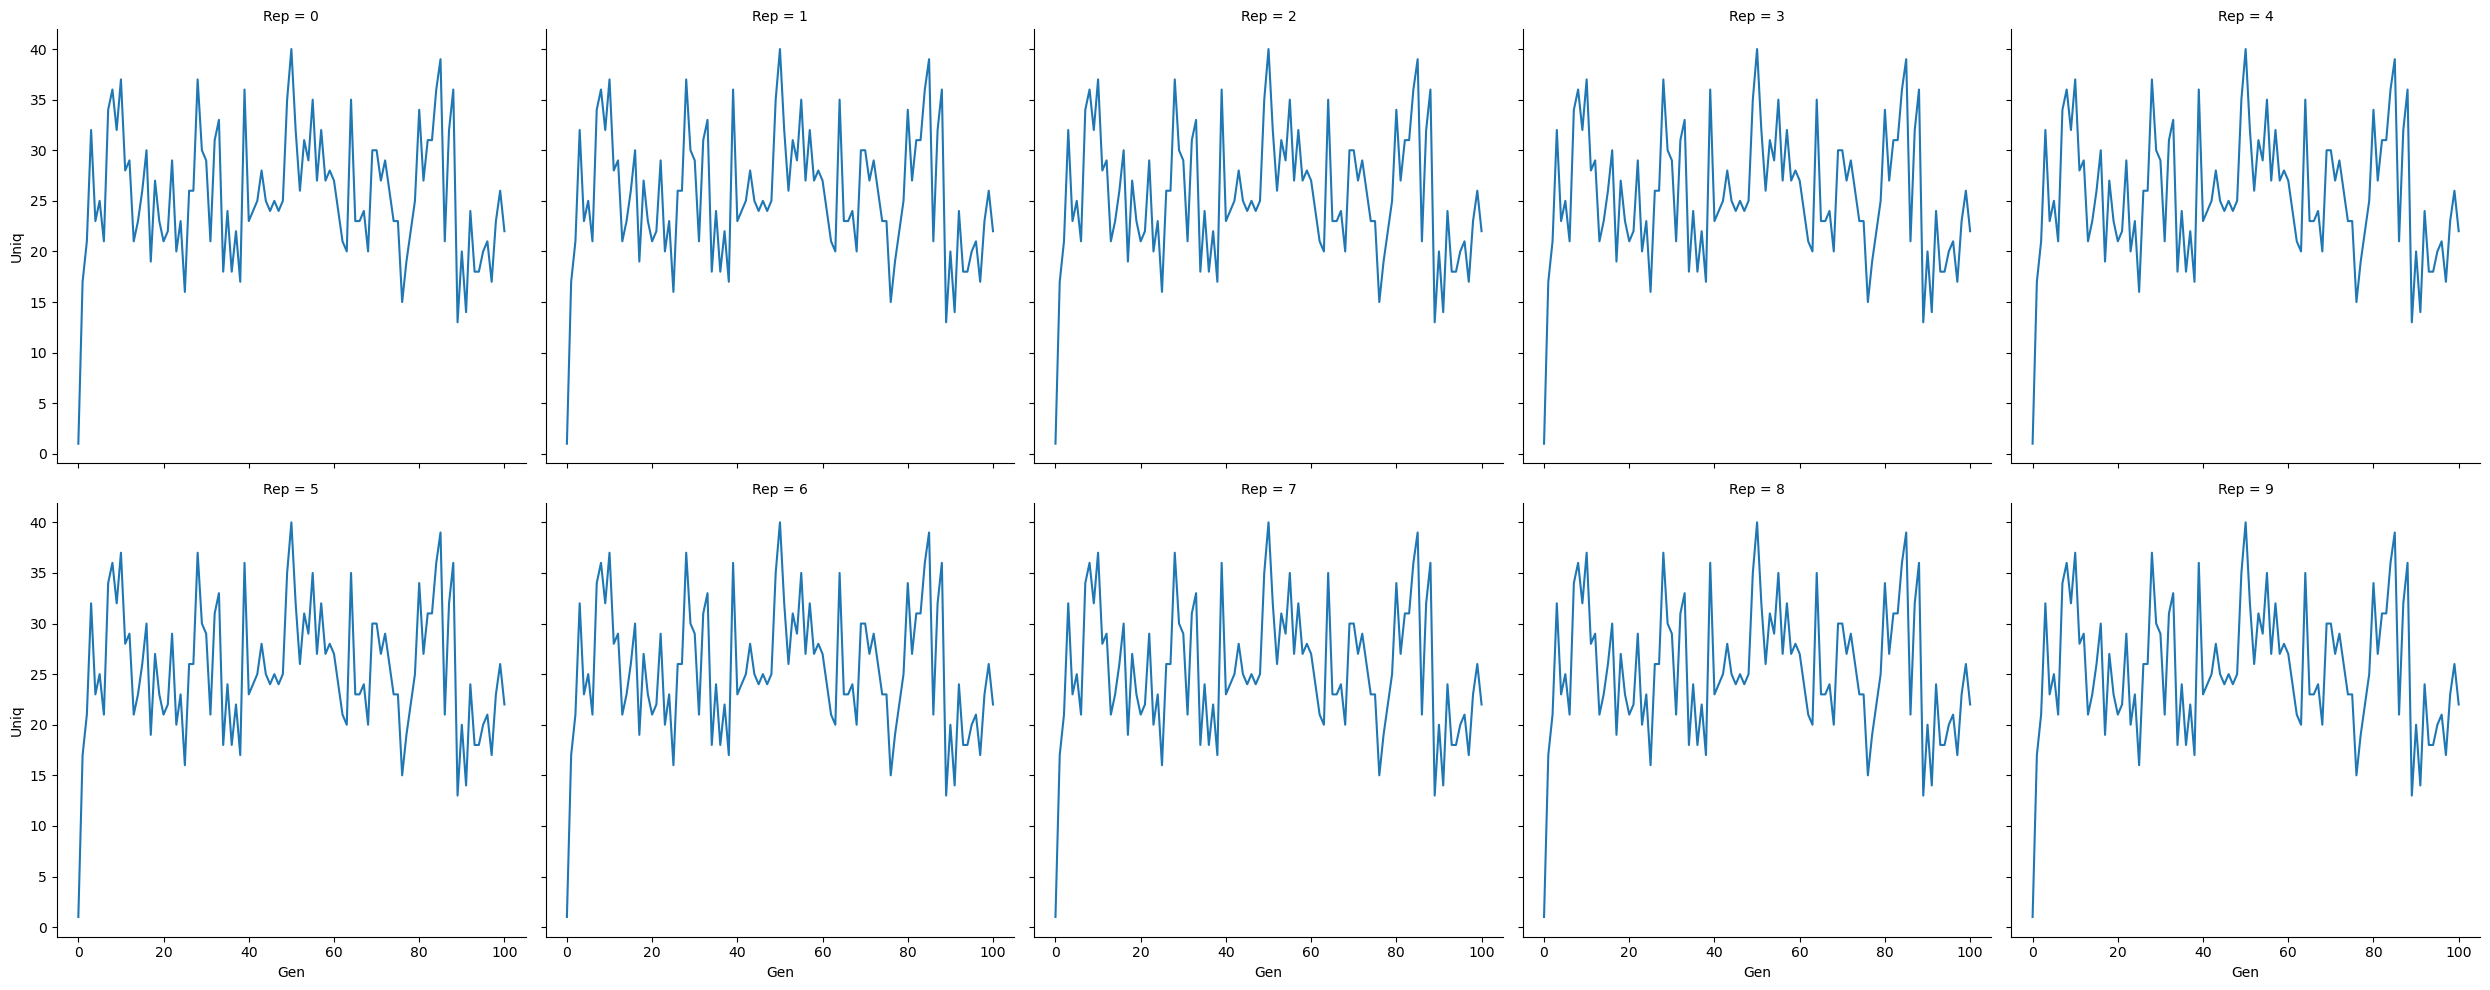

In [102]:
w3={}
count=0
#dna seq uniq
for i in w.columns:
    for j in range(10):
        _=w.loc[j][i].drop_duplicates().shape
        w3[count]={'Rep':j,'Uniq':_[0],'Gen':int(i.replace('Gen_',''))}
        count+=1
w3
w3=pd.DataFrame.from_dict(w3,orient='index')
w3.index.name='Count'
# w3=w3.reset_index()
# w3.plot(kind='line')
sbn.relplot(kind='line',data=w3,x='Gen',y='Uniq',col='Rep',col_wrap=5)

In [79]:
j

10

In [2]:
w.drop_duplicates()

NameError: name 'w' is not defined

In [16]:
w2=w

In [ ]:
l=w['Gen_10'].tolist()
p=list(set(l))


In [ ]:
with open('test_fasta_2.fasta','w') as f:
    for i in range(len(p)):
        _=f.write(f'>{i}_Gen10\n{p[i]}\n')

In [ ]:
p=list(set(l))

In [ ]:
len(p)

In [13]:
w2=w.reset_index().set_index('index')

<AxesSubplot:>

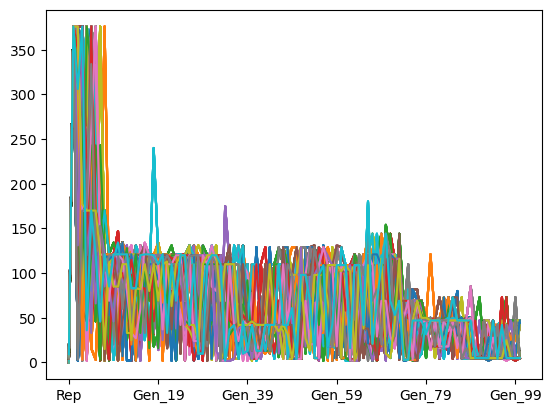

In [14]:
w2.transpose().plot(kind='line',legend=False)

In [15]:
w2

,Rep,Gen_0,Gen_1,Gen_2,Gen_3,Gen_4,Gen_5,Gen_6,Gen_7,Gen_8,...,Gen_91,Gen_92,Gen_93,Gen_94,Gen_95,Gen_96,Gen_97,Gen_98,Gen_99,Gen_100
index,,,,,,,,,,,,,,,,,,,,,
org_0,0,376,128,60,170,170,65,170,121,121,...,5,5,5,28,5,5,42,5,38,5
org_1,0,376,376,170,170,16,3,121,376,80,...,5,47,5,5,5,5,42,5,5,5
org_2,0,376,376,82,170,170,131,170,121,121,...,5,5,28,5,42,42,73,5,5,5
org_3,0,376,376,303,170,376,131,46,121,121,...,5,5,47,5,5,5,42,4,47,5
org_4,0,376,65,120,170,334,243,121,46,121,...,5,5,5,28,5,5,5,5,47,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
org_95,9,376,376,376,103,121,170,121,2,85,...,5,5,5,47,5,5,42,5,5,5
org_96,9,376,376,170,170,261,376,121,120,69,...,5,5,5,28,5,5,42,5,5,5
org_97,9,376,3,170,170,334,121,153,102,120,...,5,5,5,5,42,5,42,5,47,5


0
1
2
3
4
5
6
7
8
9


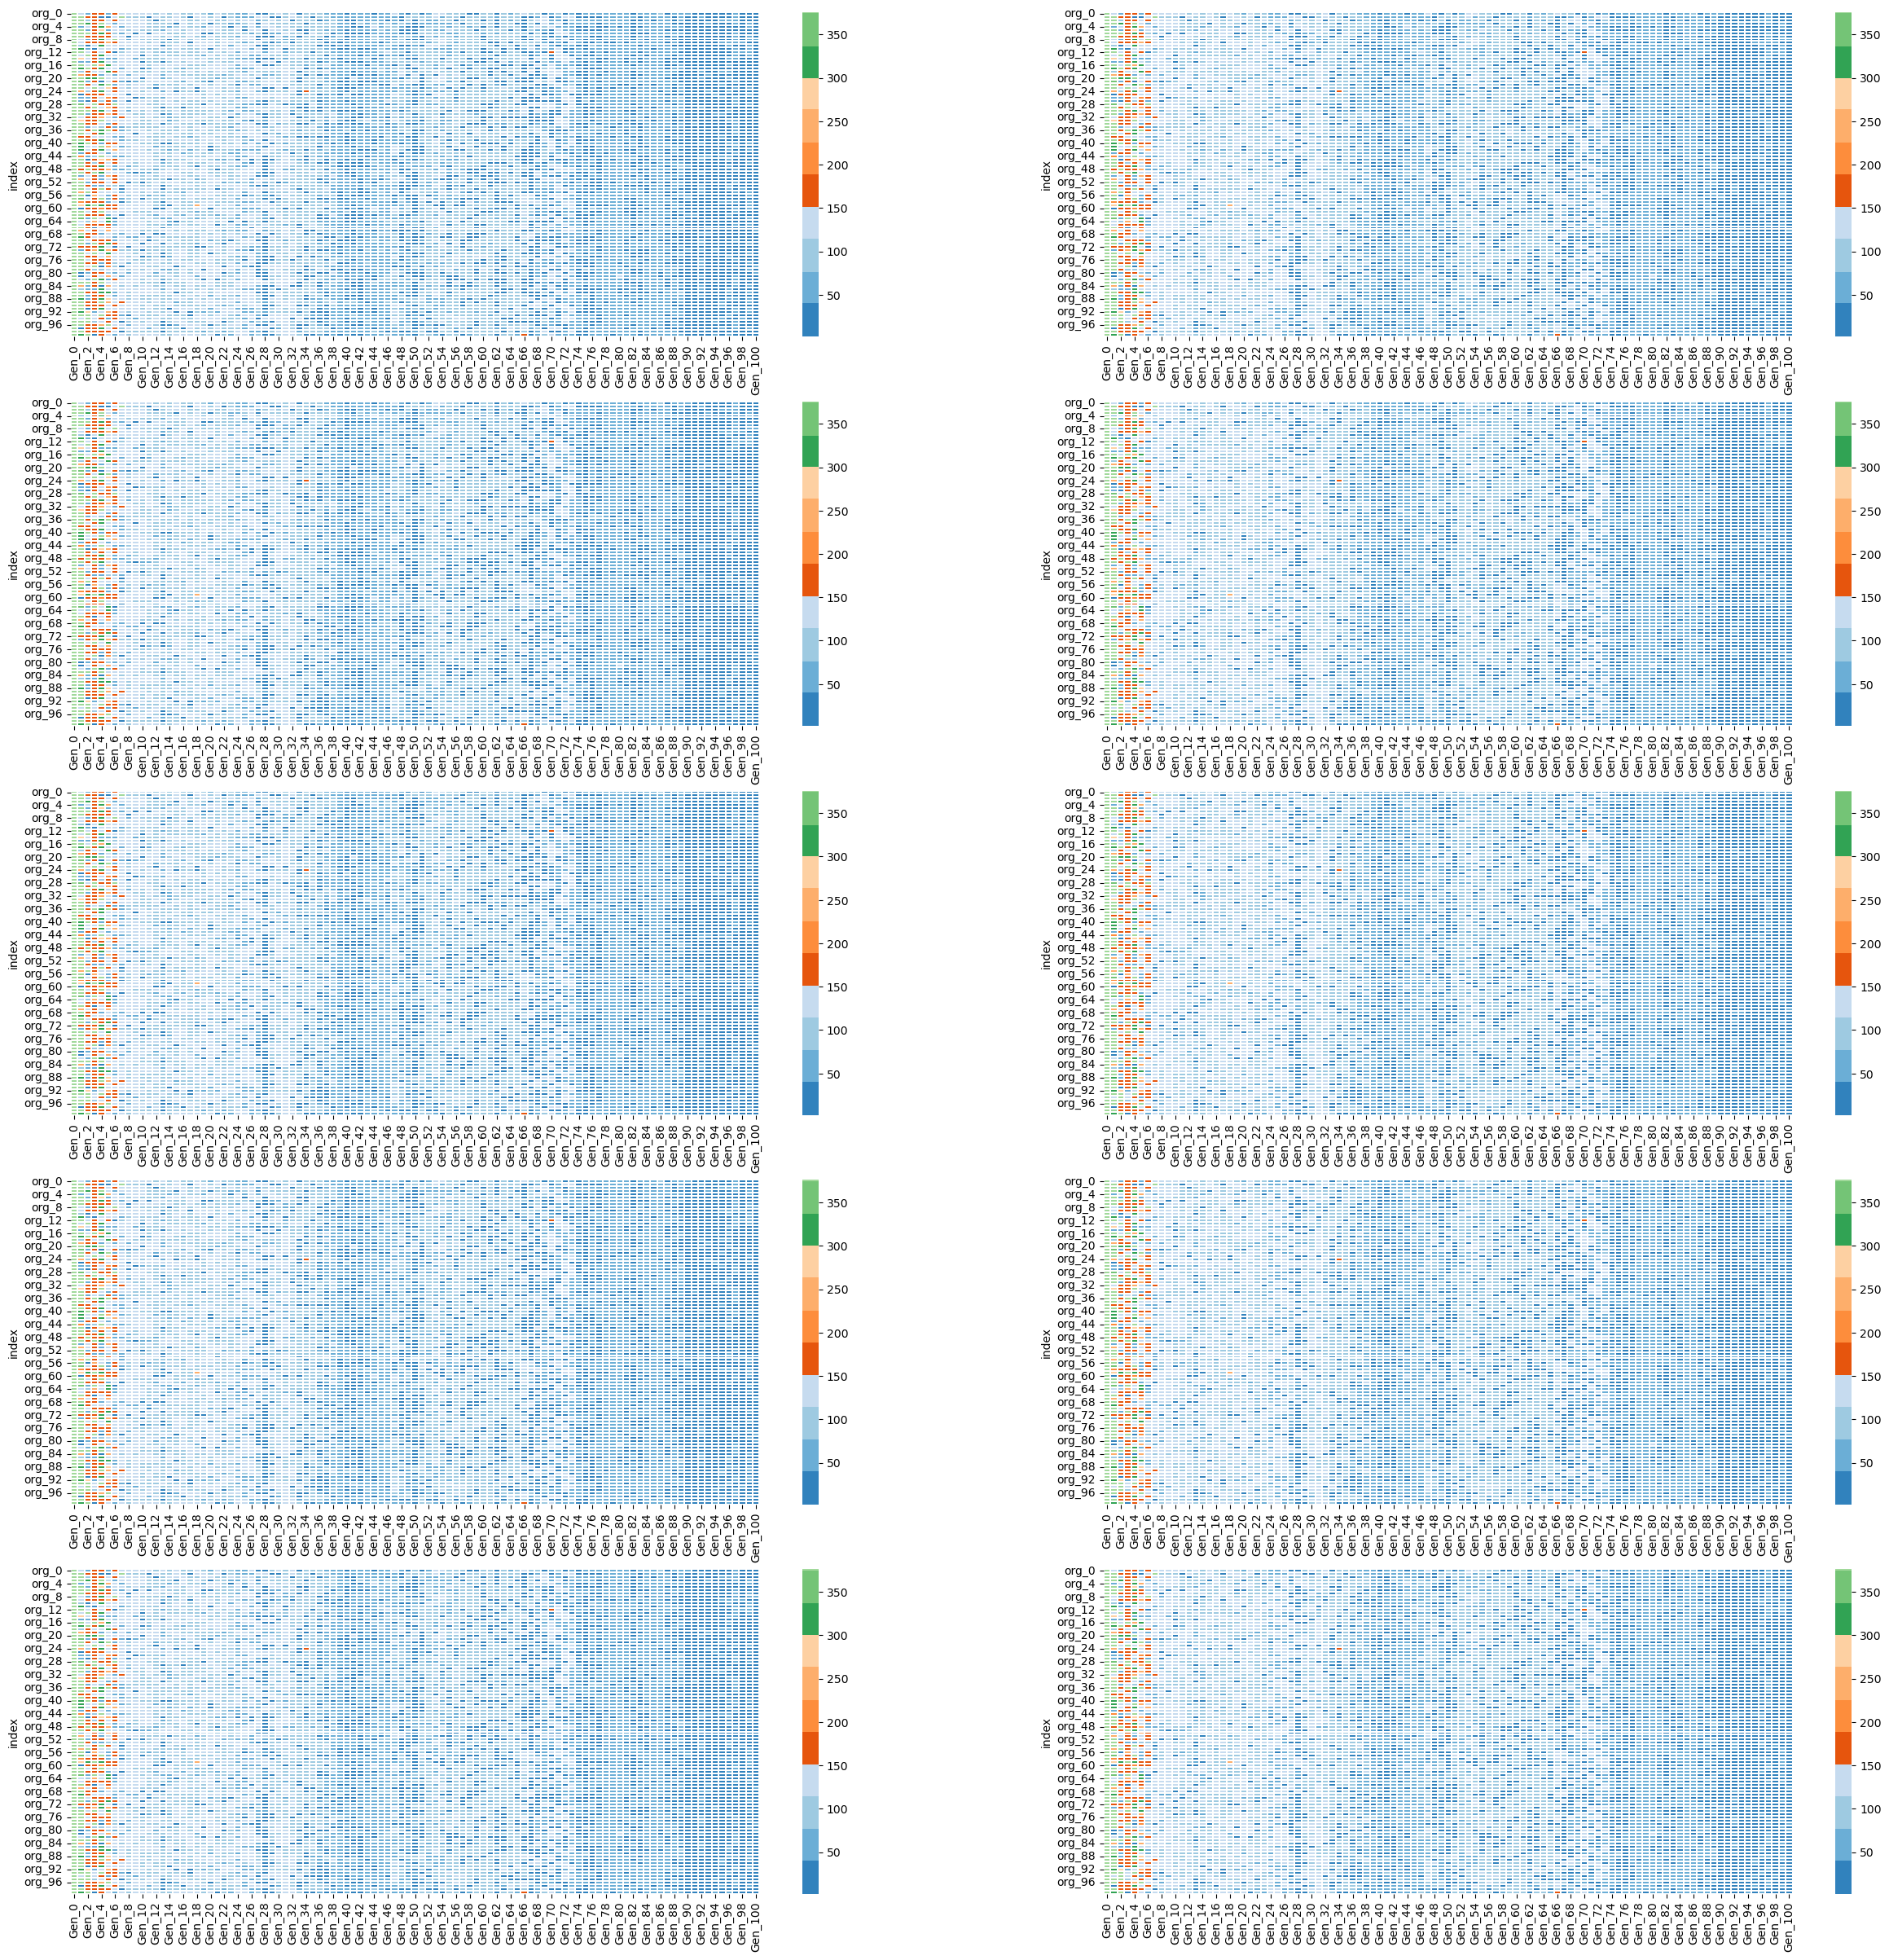

In [17]:
fig, axs = plt.subplots(nrows=5,ncols=2,figsize=(30,30))
count=0
for i in range(5):
    for j in range(2):
        _=w2[w2.Rep==count]
        _=_.iloc[:,1:]
        sbn.heatmap(data=_,cmap='tab20c',linewidths=0.2,ax=axs[i,j],center=375,linecolor='w')
        print(count)
        count+=1


<AxesSubplot:ylabel='index'>

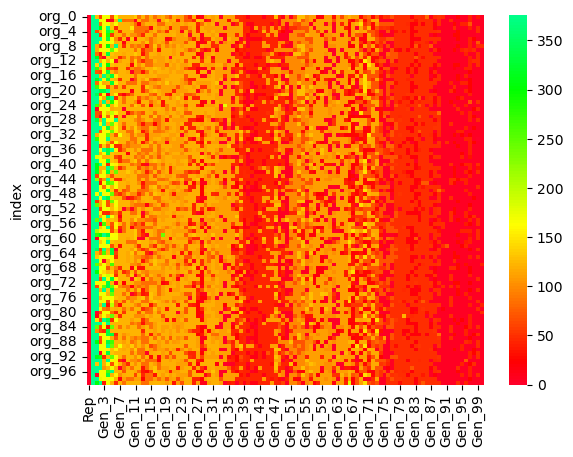

In [34]:
sbn.heatmap(data=w2[w2.Rep==0],cmap='gist_rainbow',linewidths=0,center=375,linecolor='w')